# Check dataset shapes
Compute histogram of image dimensions across training and validation sets to decide upon the optimal patch size for 3D training

In [1]:
import os
import sys
import tempfile
from glob import glob
import logging

import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("/mnt/data/mranzini/Desktop/GIFT-Surg/FBS_Monai/basic_unet_monai/src")
from io_utils import create_data_list

In [2]:
# list folders to search for the data
data_root = ["/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset/GroupA", 
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset/GroupB1",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset/GroupB2", 
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupC",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupD",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupE",
             "/mnt/data/mranzini/Desktop/GIFT-Surg/Data/NeuroImage_dataset_extension/GroupF"]

# list of subject IDs to search for data
list_root = "/mnt/data/mranzini/Desktop/GIFT-Surg/Retraining_with_expanded_dataset/config/file_names"
data_list = [os.path.join(list_root, "list_train_files.txt"), 
             os.path.join(list_root, "list_validation_h_files.txt"),
             os.path.join(list_root, "list_validation_p_files.txt")]

# 
train_files = create_data_list(data_folder_list=data_root, 
                               subject_list=data_list, 
                               img_postfix='_Image', 
                               label_postfix='_Label')

print(len(train_files))

366


In [3]:
dim_x, dim_y, dim_z = [], [], []
for t in train_files:
    filename = t["image"]
    img_nii = nib.load(filename)
    img_shape = img_nii.shape
    dim_x.append(img_shape[0])
    dim_y.append(img_shape[1])
    dim_z.append(img_shape[2])
    

In [4]:
print(len(dim_x), len(dim_y), len(dim_z))

366 366 366


Text(0.5, 1.0, 'Z direction')

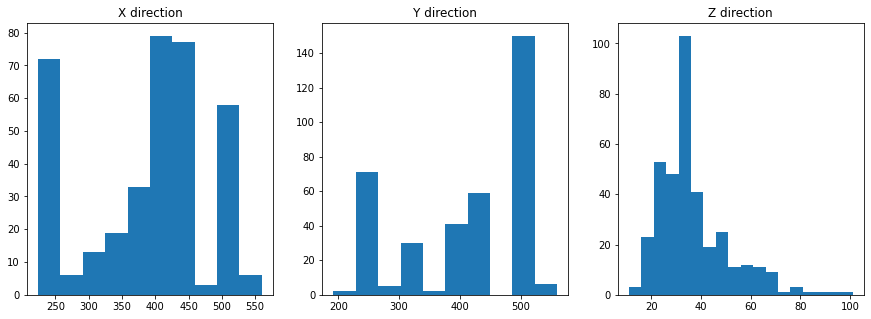

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(dim_x)
plt.title("X direction")
plt.subplot(132)
plt.hist(dim_y)
plt.title("Y direction")
plt.subplot(133)
binwidth = 5
plt.hist(dim_z, bins=range(min(dim_z), max(dim_z) + binwidth, binwidth))
plt.title("Z direction")

In [6]:
cases_below_36 = np.sum(np.array(dim_z) < 30)
print(cases_below_36)

95


# Check dataset spacing

In [9]:
sx, sy, sz = [], [], []
for t in train_files:
    filename = t["image"]
    img_nii = nib.load(filename)
    img_pixdim = img_nii.header["pixdim"]
    img_dim = img_nii.header["dim"]
    print(f"dim = {img_dim}, pixdim ={img_pixdim}")
    sx.append(img_pixdim[1])
    sy.append(img_pixdim[2])
    sz.append(img_pixdim[3])

dim = [  3 384 512  35   1   1   1   1], pixdim =[1.         0.87890625 0.87890625 6.599998   0.         0.
 0.         0.        ]
dim = [  3 464 512  45   1   1   1   1], pixdim =[1.       0.703125 0.703125 6.599991 0.       0.       0.       0.      ]
dim = [  3 512 416  46   1   1   1   1], pixdim =[1.        0.8828125 0.8828125 6.0000014 0.        0.        0.
 0.       ]
dim = [  3 416 512  80   1   1   1   1], pixdim =[1.       0.859375 0.859375 3.       0.       0.       0.       0.      ]
dim = [  3 512 416 100   1   1   1   1], pixdim =[1.       0.859375 0.859375 3.       0.       0.       0.       0.      ]
dim = [  3 416 512  85   1   1   1   1], pixdim =[1.       0.859375 0.859375 3.       0.       0.       0.       0.      ]
dim = [  3 256 256  63   1   1   1   1], pixdim =[1.   1.25 1.25 4.   0.   0.   0.   0.  ]
dim = [  3 256 256  47   1   1   1   1], pixdim =[1.   1.25 1.25 4.   0.   0.   0.   0.  ]
dim = [  3 512 448  55   1   1   1   1], pixdim =[1.    0.625 0.625 3

dim = [  3 256 256  51   1   1   1   1], pixdim =[1.        1.2890625 1.2890625 4.000002  0.        0.        0.
 0.       ]
dim = [  3 512 416  35   1   1   1   1], pixdim =[1.         0.64453125 0.64453125 3.0000002  0.         0.
 0.         0.        ]
dim = [  3 256 256  23   1   1   1   1], pixdim =[1.        0.9765625 0.9765625 3.0000002 0.        0.        0.
 0.       ]
dim = [  3 256 256  52   1   1   1   1], pixdim =[1.       1.       1.       2.000004 0.       0.       0.       0.      ]
dim = [  3 256 256  46   1   1   1   1], pixdim =[1.        1.        1.        1.9999986 0.        0.        0.
 0.       ]
dim = [  3 256 256  46   1   1   1   1], pixdim =[1.        1.        1.        2.0000026 0.        0.        0.
 0.       ]
dim = [  3 512 416  30   1   1   1   1], pixdim =[-1.         0.7519531  0.7519531  3.000001   0.         0.
  0.         0.       ]
dim = [  3 448 512  30   1   1   1   1], pixdim =[-1.         0.625      0.625      3.9999967  0.         0.
  0

dim = [  3 416 512  31   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  2.9999979  1.         0.
  0.         0.       ]
dim = [  3 512 416  35   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  2.9999979  1.         0.
  0.         0.       ]
dim = [  3 416 512  30   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  3.0000057  1.         0.
  0.         0.       ]
dim = [  3 448 512  40   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  3.999994   1.         0.
  0.         0.       ]
dim = [  3 512 416  35   1   1   1   1], pixdim =[-1.         0.5859375  0.5859375  2.9999988  0.         0.
  0.         0.       ]
dim = [  3 512 416  35   1   1   1   1], pixdim =[-1.         0.5859375  0.5859375  3.0000007  1.         0.
  0.         0.       ]
dim = [  3 416 512  35   1   1   1   1], pixdim =[-1.         0.5859375  0.5859375  2.9999995  0.         0.
  0.         0.       ]
dim = [  3 448 512  60   1   1   1   1], pixdim =[-1.         0.74218

dim = [  3 512 416  45   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  2.9999967  1.         0.
  0.         0.       ]
dim = [  3 416 512  41   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  3.000004   1.         0.
  0.         0.       ]
dim = [  3 416 512  40   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  3.0000048  1.         0.
  0.         0.       ]
dim = [  3 448 512  40   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  3.9999864  1.09       0.
  0.         0.       ]
dim = [  3 448 512  25   1   0   0   0], pixdim =[-1.         0.7421875  0.7421875  3.0000005  1.         0.
  0.         0.       ]
dim = [  3 512 416  30   1   0   0   0], pixdim =[-1.         0.7421875  0.7421875  2.9999988  1.         0.
  0.         0.       ]
dim = [  3 416 512  30   1   0   0   0], pixdim =[-1.         0.7421875  0.7421875  2.9999912  1.         0.
  0.         0.       ]
dim = [  3 416 512  30   1   0   0   0], pixdim =[-1.         0.74218

dim = [  3 336 336  37   1   1   1   1], pixdim =[-1.0000000e+00  7.4404764e-01  7.4404764e-01  3.0000036e+00
  1.2182844e+01  1.0000000e+00  1.0000000e+00  3.4443371e+04]
dim = [  3 336 336  23   1   1   1   1], pixdim =[-1.0000000e+00  7.4404764e-01  7.4404764e-01  2.9999976e+00
  7.4967833e+00  1.0000000e+00  1.0000000e+00  3.3367070e+04]
dim = [  3 336 336  51   1   1   1   1], pixdim =[-1.0000000e+00  7.4404764e-01  7.4404764e-01  3.0000010e+00
  1.5931410e+01  1.0000000e+00  1.0000000e+00  3.3510172e+04]
dim = [  3 336 336  41   1   1   1   1], pixdim =[-1.0000000e+00  7.4404764e-01  7.4404764e-01  2.9999959e+00
  1.3119986e+01  1.0000000e+00  1.0000000e+00  3.3700352e+04]
dim = [  3 336 336  24   1   1   1   1], pixdim =[-1.0000000e+00  7.7380955e-01  7.7380955e-01  2.9999976e+00
  7.6867743e+00  1.0000000e+00  1.0000000e+00  3.4802012e+04]
dim = [  3 336 336  24   1   1   1   1], pixdim =[-1.0000000e+00  7.7380955e-01  7.7380955e-01  2.9999957e+00
  7.6866312e+00  1.0000000e+00

dim = [  3 416 512  35   1   1   1   1], pixdim =[-1.         0.5859375  0.5859375  2.999994   1.         0.
  0.         0.       ]
dim = [  3 448 512  66   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  3.9999852  1.         0.
  0.         0.       ]
dim = [  3 512 448  36   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  3.000004   1.         0.
  0.         0.       ]
dim = [  3 416 512  37   1   1   1   1], pixdim =[-1.         0.5859375  0.5859375  3.0000048  1.         0.
  0.         0.       ]
dim = [  3 512 416  40   1   1   1   1], pixdim =[-1.         0.5859375  0.5859375  3.0000062  1.         0.
  0.         0.       ]
dim = [  3 416 512  35   1   1   1   1], pixdim =[-1.         0.5859375  0.5859375  3.0000002  1.         0.
  0.         0.       ]
dim = [  3 448 512  54   1   1   1   1], pixdim =[-1.         0.7421875  0.7421875  4.0000024  1.         0.
  0.         0.       ]
dim = [  3 400 400  31   1   1   1   1], pixdim =[-1.      0.65    0.

Text(0.5, 1.0, 'Z direction')

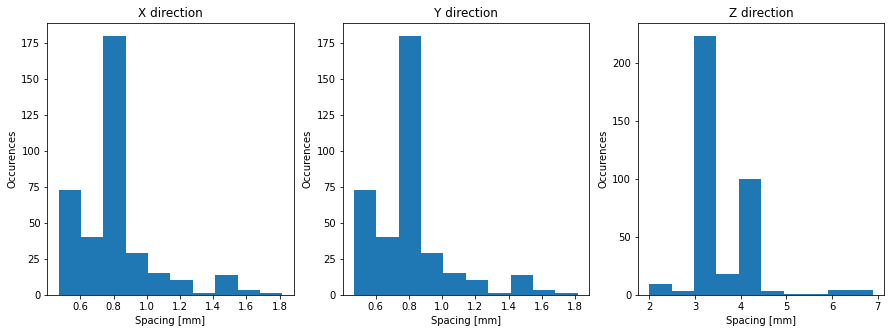

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(sx)
plt.xlabel("Spacing [mm]")
plt.ylabel("Occurences")
plt.title("X direction")

plt.subplot(132)
plt.hist(sy)
plt.xlabel("Spacing [mm]")
plt.ylabel("Occurences")
plt.title("Y direction")

plt.subplot(133)
binwidth = 5
plt.hist(sz)
plt.xlabel("Spacing [mm]")
plt.ylabel("Occurences")
plt.title("Z direction")